In [16]:
#!/usr/bin/env python3
from common.transformations.camera import transform_img, eon_intrinsics
from common.transformations.model import medmodel_intrinsics
import numpy as np
from tqdm import tqdm
import matplotlib
import matplotlib.pyplot as plt

import cv2 
from tensorflow.keras.models import load_model
from common.tools.lib.parser import parser
import sys
camerafile = "video.avi"
supercombo = load_model('models/supercombo.keras')

MAX_DISTANCE = 140.
LANE_OFFSET = 1.8
MAX_REL_V = 10.

LEAD_X_SCALE = 10
LEAD_Y_SCALE = 10

In [17]:
cap = cv2.VideoCapture(camerafile)

NBFRAME = 50

def frame_to_tensorframe(frame):                                                                                               
  H = (frame.shape[0]*2)//3                                                                                                
  W = frame.shape[1]                                                                                                       
  in_img1 = np.zeros((6, H//2, W//2), dtype=np.uint8)                                                      
                                                                                                                            
  in_img1[0] = frame[0:H:2, 0::2]                                                                                    
  in_img1[1] = frame[1:H:2, 0::2]                                                                                    
  in_img1[2] = frame[0:H:2, 1::2]                                                                                    
  in_img1[3] = frame[1:H:2, 1::2]                                                                                    
  in_img1[4] = frame[H:H+H//4].reshape((-1, H//2,W//2))                                                              
  in_img1[5] = frame[H+H//4:H+H//2].reshape((-1, H//2,W//2))
  return in_img1

def vidframe2img_yuv_reshaped():
  ret, frame = cap.read()
  img_yuv = cv2.cvtColor(frame, cv2.COLOR_BGR2YUV_I420)
  return frame, img_yuv.reshape((874*3//2, 1164))

def vidframe2frame_tensors():
  frame, img = vidframe2img_yuv_reshaped()
  imgs_med_model = transform_img(img, from_intr=eon_intrinsics, to_intr=medmodel_intrinsics, yuv=True,
                                    output_size=(512,256))
  f2t = frame_to_tensorframe(np.array(imgs_med_model)).astype(np.float32)/128.0 - 1.0
  return frame, f2t



  0%|          | 0/49 [00:00<?, ?it/s]

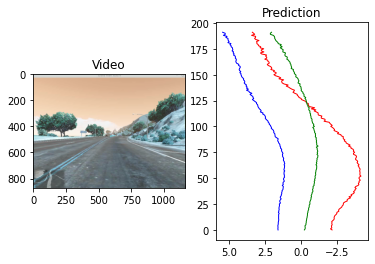

  2%|▏         | 1/49 [00:00<00:19,  2.47it/s]

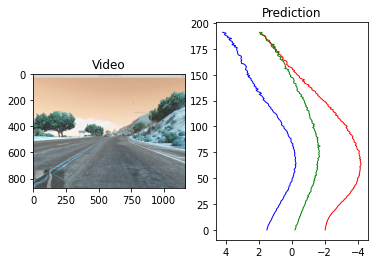

  4%|▍         | 2/49 [00:00<00:18,  2.57it/s]

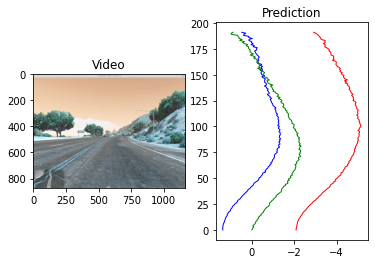

  6%|▌         | 3/49 [00:01<00:18,  2.53it/s]

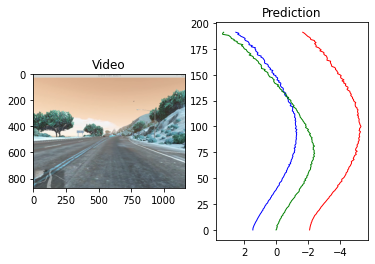

  8%|▊         | 4/49 [00:01<00:18,  2.39it/s]

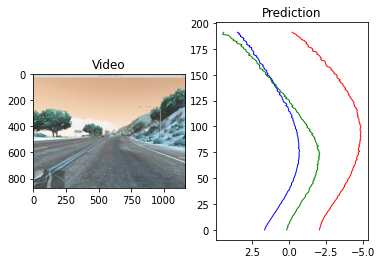

 10%|█         | 5/49 [00:02<00:20,  2.18it/s]

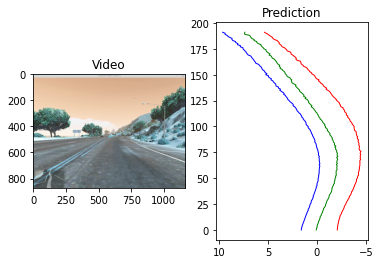

 12%|█▏        | 6/49 [00:02<00:18,  2.38it/s]

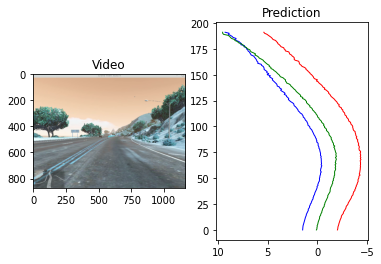

 14%|█▍        | 7/49 [00:02<00:16,  2.53it/s]

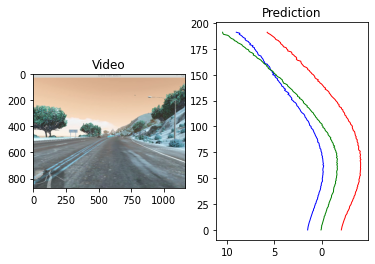

 16%|█▋        | 8/49 [00:03<00:15,  2.64it/s]

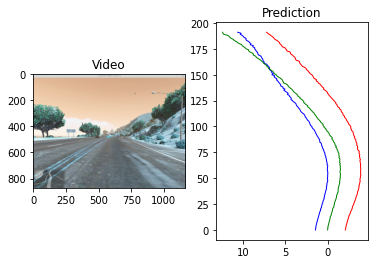

 18%|█▊        | 9/49 [00:03<00:14,  2.71it/s]

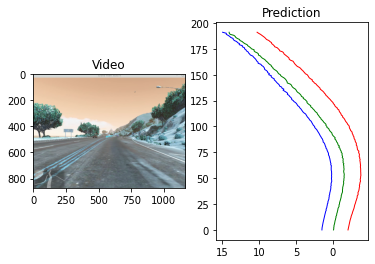

 20%|██        | 10/49 [00:03<00:14,  2.76it/s]

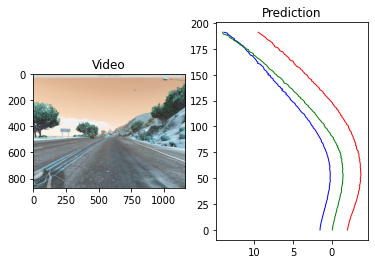

 22%|██▏       | 11/49 [00:04<00:14,  2.63it/s]

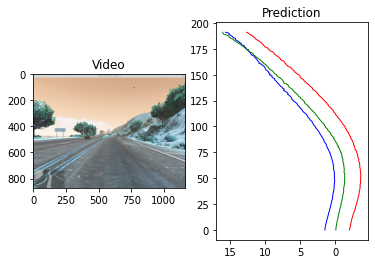

 24%|██▍       | 12/49 [00:04<00:14,  2.56it/s]

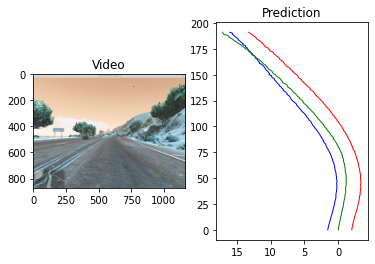

 27%|██▋       | 13/49 [00:05<00:14,  2.57it/s]

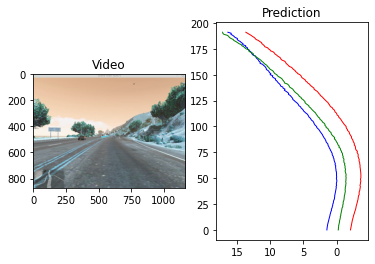

 29%|██▊       | 14/49 [00:05<00:15,  2.23it/s]

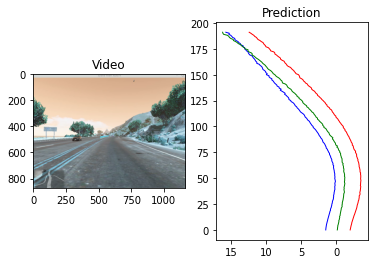

 31%|███       | 15/49 [00:06<00:15,  2.19it/s]

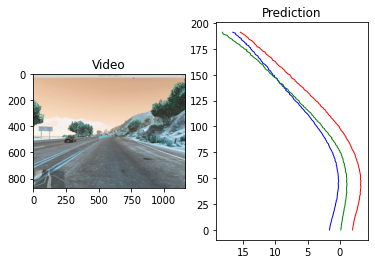

 33%|███▎      | 16/49 [00:06<00:14,  2.24it/s]

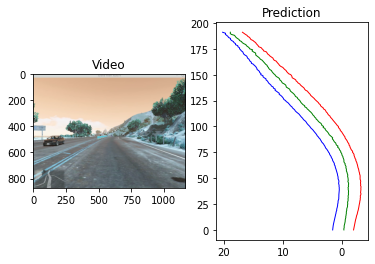

 35%|███▍      | 17/49 [00:06<00:13,  2.43it/s]

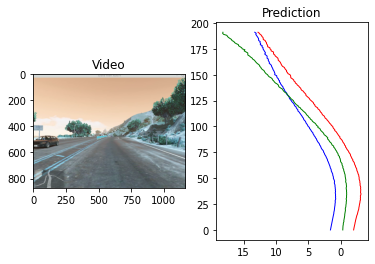

 37%|███▋      | 18/49 [00:07<00:12,  2.48it/s]

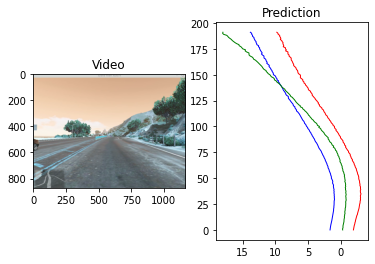

 39%|███▉      | 19/49 [00:07<00:12,  2.46it/s]

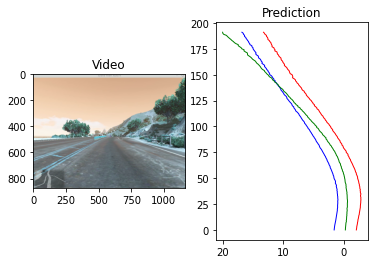

 41%|████      | 20/49 [00:08<00:11,  2.42it/s]

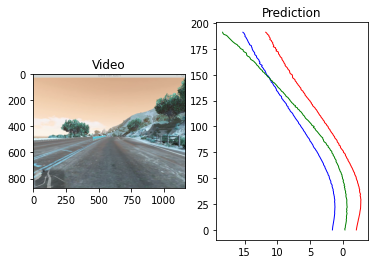

 43%|████▎     | 21/49 [00:08<00:11,  2.39it/s]

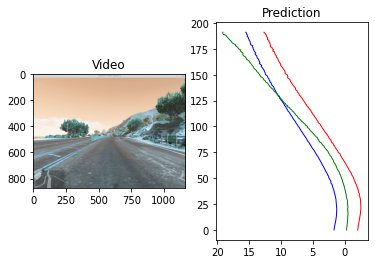

 45%|████▍     | 22/49 [00:09<00:11,  2.36it/s]

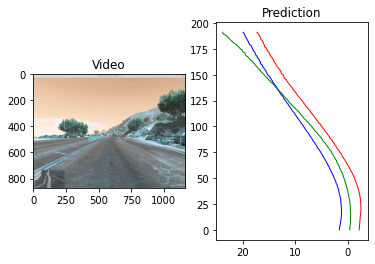

 47%|████▋     | 23/49 [00:09<00:10,  2.51it/s]

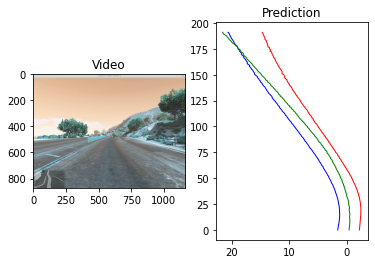

 49%|████▉     | 24/49 [00:09<00:09,  2.55it/s]

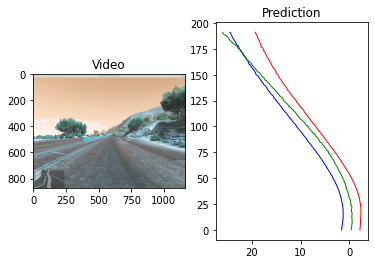

 51%|█████     | 25/49 [00:10<00:09,  2.56it/s]

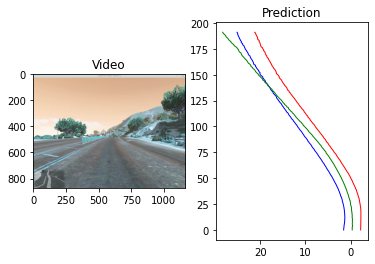

 53%|█████▎    | 26/49 [00:10<00:08,  2.64it/s]

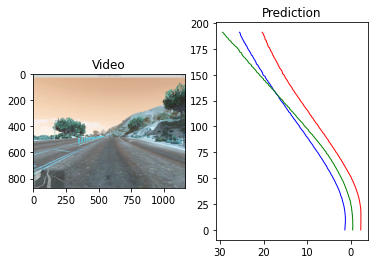

 55%|█████▌    | 27/49 [00:10<00:08,  2.68it/s]

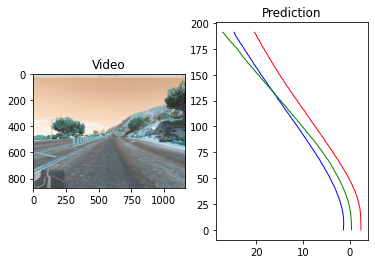

 57%|█████▋    | 28/49 [00:11<00:07,  2.67it/s]

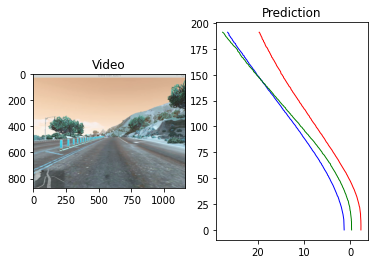

 59%|█████▉    | 29/49 [00:11<00:07,  2.71it/s]

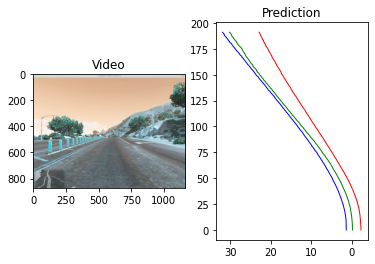

 61%|██████    | 30/49 [00:11<00:07,  2.70it/s]

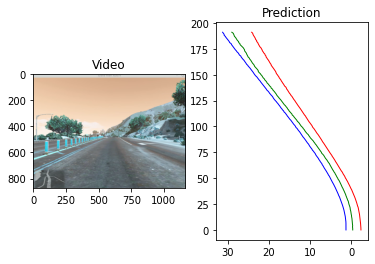

 63%|██████▎   | 31/49 [00:12<00:08,  2.13it/s]

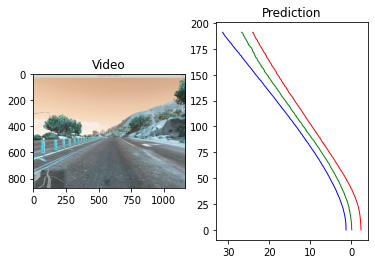

 65%|██████▌   | 32/49 [00:13<00:07,  2.23it/s]

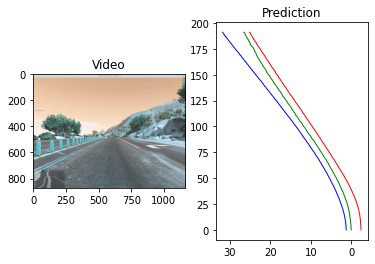

 67%|██████▋   | 33/49 [00:13<00:06,  2.36it/s]

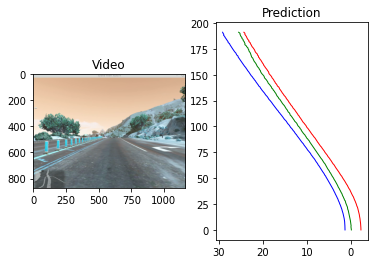

 69%|██████▉   | 34/49 [00:13<00:06,  2.50it/s]

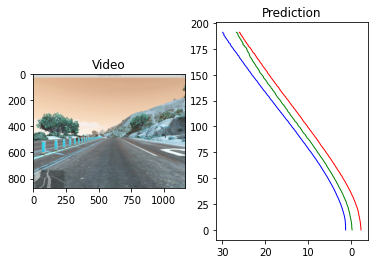

 71%|███████▏  | 35/49 [00:14<00:05,  2.58it/s]

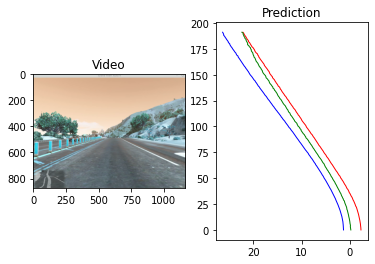

 73%|███████▎  | 36/49 [00:14<00:04,  2.67it/s]

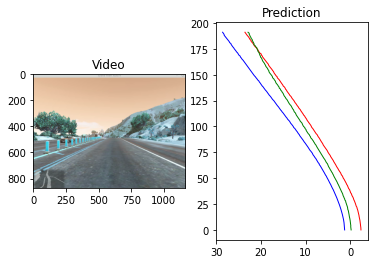

 76%|███████▌  | 37/49 [00:14<00:04,  2.48it/s]

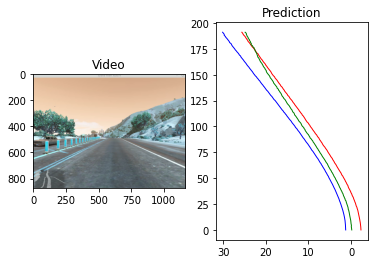

 78%|███████▊  | 38/49 [00:15<00:04,  2.36it/s]

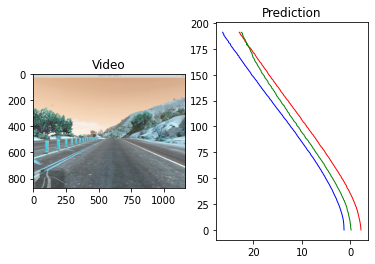

 80%|███████▉  | 39/49 [00:15<00:04,  2.49it/s]

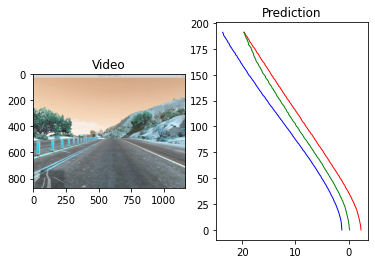

 82%|████████▏ | 40/49 [00:16<00:03,  2.62it/s]

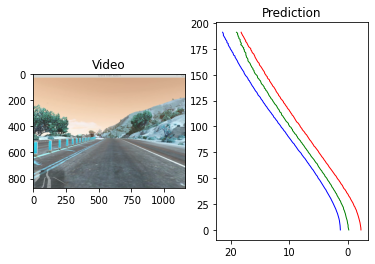

 84%|████████▎ | 41/49 [00:16<00:03,  2.61it/s]

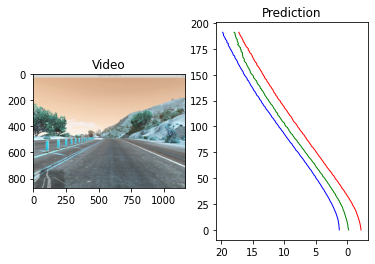

 86%|████████▌ | 42/49 [00:16<00:02,  2.62it/s]

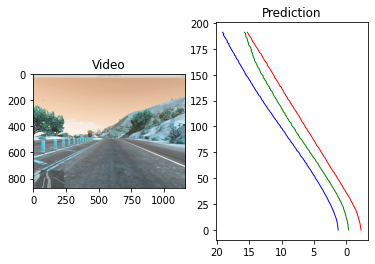

 88%|████████▊ | 43/49 [00:17<00:02,  2.65it/s]

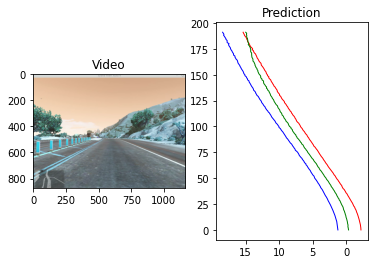

 90%|████████▉ | 44/49 [00:17<00:01,  2.72it/s]

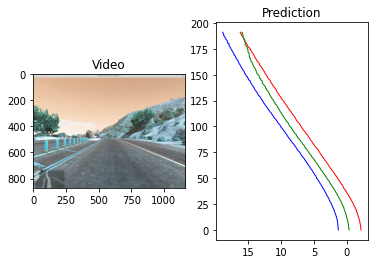

 92%|█████████▏| 45/49 [00:17<00:01,  2.65it/s]

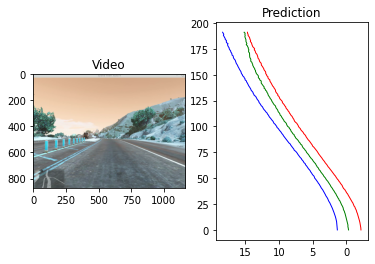

 94%|█████████▍| 46/49 [00:18<00:01,  2.66it/s]

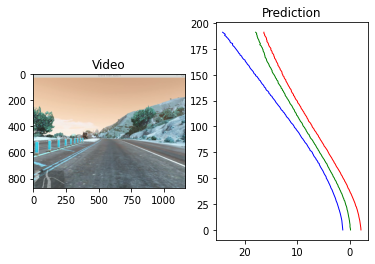

 96%|█████████▌| 47/49 [00:18<00:00,  2.69it/s]

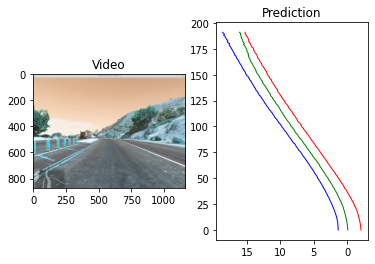

 98%|█████████▊| 48/49 [00:19<00:00,  2.33it/s]

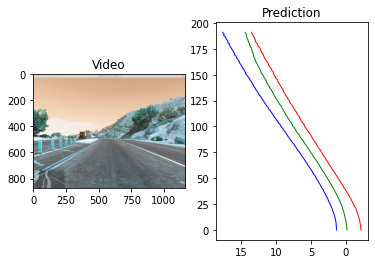

100%|██████████| 49/49 [00:19<00:00,  2.49it/s]


In [27]:
state = np.zeros((1,512))
desire = np.zeros((1,8))

frame_tensors = np.zeros((NBFRAME,6,128,256))
for i in tqdm(range(NBFRAME)):
    frame_tensors[i] = vidframe2frame_tensors()[1]

cap2 = cv2.VideoCapture("video2.avi")

for i in tqdm(range(NBFRAME-1)):
  # if i == 0:
  #   frame, frame_tensors1 = vidframe2frame_tensors()
  # else :
  #   frame, frame_tensors2 = vidframe2frame_tensors()
  #   inputs = [np.vstack([frame_tensors1,frame_tensors2])[None], desire, state]
    inputs = [np.vstack(frame_tensors[i:i+2])[None], desire, state]
    outs = supercombo.predict(inputs)
    parsed = parser(outs)
    # Important to refeed the state
    state = outs[-1]
    pose = outs[-2]
    ret, frame = cap2.read()
    # frame = cv2.resize(frame, (640, 420))
    # # Show raw camera image
    plt.subplot(1, 2, 1) # row 1, col 2 index 1
    plt.title("Video")
    plt.imshow(frame)
    # if cv2.waitKey(10) & 0xFF == ord('q'):
    #   break
    # Clean plot for next frame
    # plt.clf()
    plt.subplot(1, 2, 2) # row 1, col 2 index 1
    plt.title("Prediction")
    # lll = left lane line
    plt.plot(parsed["lll"][0], range(0,192), "b-", linewidth=1)
    # rll = right lane line
    plt.plot(parsed["rll"][0], range(0, 192), "r-", linewidth=1)
    # path = path cool isn't it ?
    plt.plot(parsed["path"][0], range(0, 192), "g-", linewidth=1)


    #print(np.array(pose[0,:3]).shape)
    #plt.scatter(pose[0,:3], range(3), c="y")
    
    # Needed to invert axis because standart left lane is positive and right lane is negative, so we flip the x axis
    plt.gca().invert_xaxis()
    plt.pause(0.001)


plt.show()


In [24]:
mi = min(min(parsed["lll"][0]),min(parsed["rll"][0]),min(parsed["path"][0]))
ma = max(max(parsed["lll"][0]),max(parsed["rll"][0]),max(parsed["path"][0]))
plt.imshow(frame,extent=[mi,ma,0,192])

-11.801284